# Grid Extension

KANs can be initially trained using a coarse spline grid with fewer parameters and subsequently expanded to a higher-parameter model simply by refining the
spline grid. Here, we apply the grid extension technique to KANs for fitting the target function $f(x_1,x_2)={\rm exp}({\rm sin}(\pi x_1)+x_2^2)$.

### Initial Setup

In [1]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# target fitting function
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)

# create dataset
dataset = create_dataset(f, n_var=2, device=device, train_num=1000)

# refine grid intervals from 3 to 100
grids = np.array([3,5,10,20,50,100])

# training steps for each grid interval
steps = 50

cuda


### Grid Refinement on [2,5,1] KAN

In [2]:
train_losses = []
test_losses = []

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,5,1], grid=grids[i], k=3, seed=0, device=device)
    else:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.89e-03 | test_loss: 4.16e-03 | reg: 1.53e+01 | : 100%|█| 50/50 [00:09<00:00,  5.21it


saving model version 0.1
saving model version 0.2


| train_loss: 1.30e-03 | test_loss: 1.39e-03 | reg: 1.51e+01 | : 100%|█| 50/50 [00:08<00:00,  5.71it


saving model version 0.3
saving model version 0.4


| train_loss: 2.61e-04 | test_loss: 3.32e-04 | reg: 1.49e+01 | : 100%|█| 50/50 [00:08<00:00,  5.68it


saving model version 0.5
saving model version 0.6


| train_loss: 9.79e-05 | test_loss: 1.34e-04 | reg: 1.49e+01 | : 100%|█| 50/50 [00:08<00:00,  5.82it


saving model version 0.7
saving model version 0.8


| train_loss: 6.57e-05 | test_loss: 1.34e-04 | reg: 1.49e+01 | : 100%|█| 50/50 [00:05<00:00,  9.01it


saving model version 0.9
saving model version 0.10


| train_loss: 3.18e-05 | test_loss: 2.05e-04 | reg: 1.49e+01 | : 100%|█| 50/50 [00:06<00:00,  7.15it

saving model version 0.11


### Visualization of Training and Testing Losses

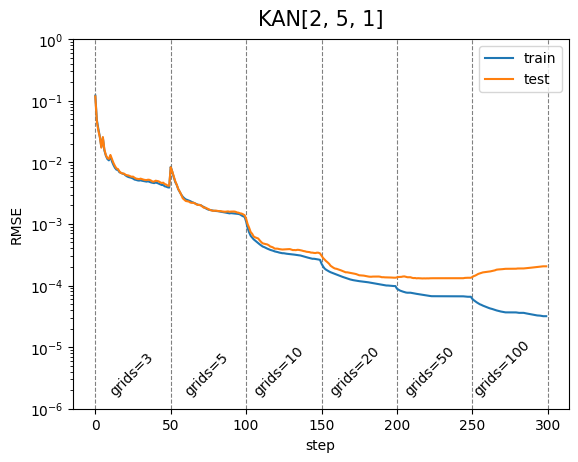

In [3]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.ylim(1e-6, 1)
plt.yscale('log')
plt.title('KAN[2, 5, 1]', fontsize=15, pad=10)
plt.grid(axis='x', linestyle='--', color='gray')
for i in range(grids.shape[0]):
    plt.text(steps * i + 40, 1.5e-6, f'grids={grids[i]}', rotation=45, ha='right', va='bottom')

### Grid Refinement on [2,1,1] KAN

In [4]:
train_losses = []
test_losses = []

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,1,1], grid=grids[i], k=3, seed=0, device=device)
    else:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.35e-02 | test_loss: 1.38e-02 | reg: 1.13e+01 | : 100%|█| 50/50 [00:07<00:00,  6.63it


saving model version 0.1
saving model version 0.2


| train_loss: 7.27e-03 | test_loss: 7.21e-03 | reg: 1.13e+01 | : 100%|█| 50/50 [00:05<00:00,  8.62it


saving model version 0.3
saving model version 0.4


| train_loss: 4.85e-04 | test_loss: 4.92e-04 | reg: 1.13e+01 | : 100%|█| 50/50 [00:06<00:00,  8.25it


saving model version 0.5
saving model version 0.6


| train_loss: 4.72e-05 | test_loss: 6.32e-05 | reg: 1.13e+01 | : 100%|█| 50/50 [00:06<00:00,  7.47it


saving model version 0.7
saving model version 0.8


| train_loss: 1.50e-05 | test_loss: 2.96e-05 | reg: 1.13e+01 | : 100%|█| 50/50 [00:03<00:00, 12.57it


saving model version 0.9
saving model version 0.10


| train_loss: 1.17e-05 | test_loss: 3.20e-05 | reg: 1.13e+01 | : 100%|█| 50/50 [00:02<00:00, 21.53it

saving model version 0.11


### Visualization of Training and Testing Losses

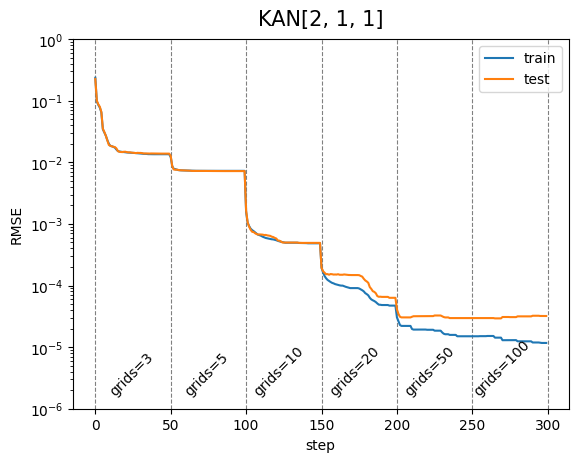

In [5]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.ylim(1e-6, 1)
plt.yscale('log')
plt.title('KAN[2, 1, 1]', fontsize=15, pad=10)
plt.grid(axis='x', linestyle='--', color='gray')
for i in range(grids.shape[0]):
    plt.text(steps * i + 40, 1.5e-6, f'grids={grids[i]}', rotation=45, ha='right', va='bottom')